In [63]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [64]:
df = pd.read_csv('/content/Churn_Modelling.csv')

1. Dispaly Top 5 Rows of the Dataset

In [65]:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


2. Check Last 5 Rows of the Dataset

In [66]:

df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


3. Find Shape of Our Dataset(Number of Rows and columns)

In [67]:
df.shape


(10000, 14)

<Axes: ylabel='count'>

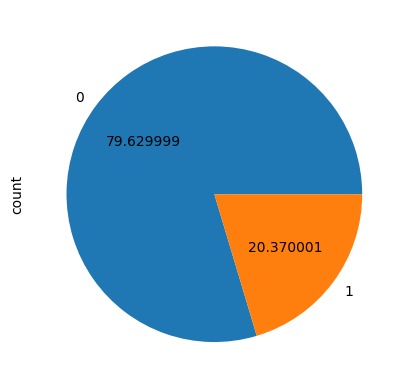

In [68]:
df['Exited'].value_counts().plot(kind = 'pie', autopct= '%2f')

<Axes: ylabel='count'>

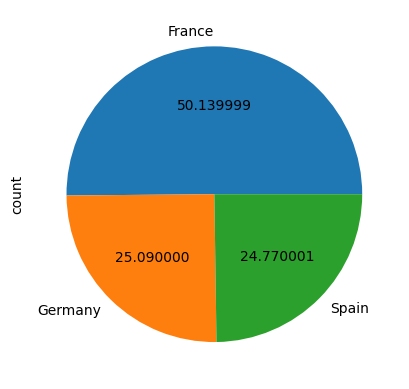

In [69]:
df['Geography'].value_counts().plot(kind = 'pie', autopct= '%2f')

<Axes: ylabel='count'>

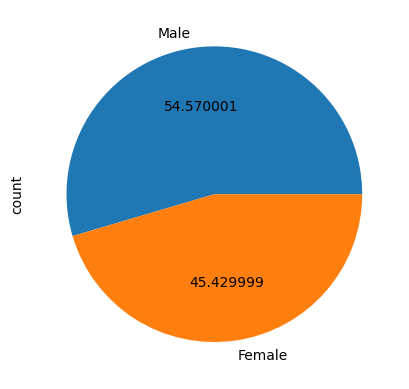

In [70]:
df['Gender'].value_counts().plot(kind = 'pie', autopct= '%2f')

<Axes: ylabel='count'>

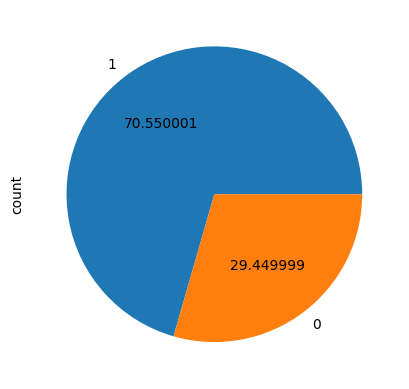

In [71]:
df['HasCrCard'].value_counts().plot(kind = 'pie', autopct= '%2f')


<Axes: ylabel='count'>

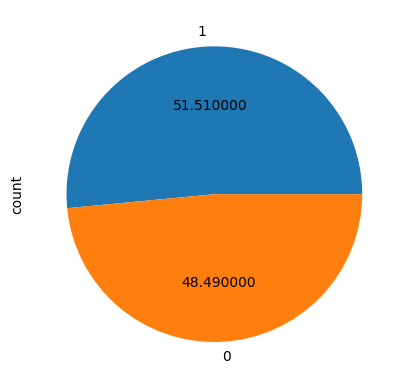

In [72]:
df['IsActiveMember'].value_counts().plot(kind = 'pie', autopct= '%2f')


4. Get Information About Our Dataset Like total number of rows , total number of columns , Datatypes of each column and memory requirement

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


5. check Values in the Dataset

In [74]:

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

6. Get Overall Statistics About the dataset

In [75]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


7.Dropping Irrelevent Features

In [76]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [77]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1 )

In [78]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


8. Encoding Categorical data

In [79]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [80]:
df['Geography'] = df['Geography'].map({'France':1, 'Germany': 0, 'Spain': 2})

In [81]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


9. **Separating dependent and independent *variables***

In [85]:
X = df.drop('Exited', axis=1)
Y= df['Exited']

In [86]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64
9996,516,1,1,35,10,57369.61,1,1,1,101699.77
9997,709,1,0,36,7,0.00,1,0,1,42085.58
9998,772,0,1,42,3,75075.31,2,1,0,92888.52


In [87]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

10. Splitting the dataset into the Training set and Testing set

Handling Imbalanced Data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res ,Y_res = SMOTE().fit_resample(X,Y)

In [102]:
Y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

10. Splitting the dataset into the Training set and Testing set

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state =42)


11. Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform (X_train)
X_test = sc.fit_transform (X_test)


In [90]:
X_train

array([[ 0.35649971,  0.00282632,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777, -1.41033342,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.41598606,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853,  0.00282632, -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282,  0.00282632,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475, -1.41033342,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

12. Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
log = LogisticRegression()

In [93]:
log.fit(X_train, Y_train)

LogisticRegression()

In [94]:
y_pred = log.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(Y_test, y_pred)

0.8165

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [98]:
precision_score(Y_test, y_pred)

0.6031746031746031

In [99]:
recall_score(Y_test, y_pred)

0.19338422391857507

In [100]:
f1_score(Y_test, y_pred)


0.2928709055876686

13. SVC

In [103]:
from sklearn import svm


In [104]:
svm = svm.SVC()

In [105]:
svm.fit(X_train,Y_train)

SVC()

In [107]:
y_pred2 = svm.predict(X_test)

In [109]:
accuracy_score (Y_test,y_pred2)

0.8565

14. KNeighbors Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier()

In [112]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [113]:
y_pred3 = knn.predict(X_test)

In [114]:
accuracy_score(Y_test,y_pred3)

0.8295

In [117]:
precision_score(Y_test, y_pred3)

0.6065573770491803

15. Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier


In [119]:
rf = RandomForestClassifier()


In [120]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [121]:
y_pred4 = rf.predict(X_test)

In [123]:
accuracy_score(Y_test, y_pred4)

0.865

In [124]:
precision_score(Y_test,y_pred4)

0.7411764705882353

16. Gradient Boosting Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
gbc = GradientBoostingClassifier()


In [135]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [136]:
y_pred5 = gbc.predict(X_test)

In [139]:
accuracy_score(Y_test, y_pred5)

0.8665

In [140]:
precision_score(Y_test, y_pred5)

0.74609375

In [143]:
final_data = pd.DataFrame ({'Models':['Lr', 'SVC', 'KNN', 'Rf', 'GBC'], 'ACC':
                                           [accuracy_score(Y_test, y_pred),
                                           accuracy_score(Y_test, y_pred2),
                                            accuracy_score(Y_test, y_pred3),
                                            accuracy_score(Y_test, y_pred4),
                                            accuracy_score(Y_test, y_pred5)]})







In [144]:
final_data

,Models,ACC
0,Lr,0.8165
1,SVC,0.8565
2,KNN,0.8295
3,Rf,0.8650
4,GBC,0.8665


In [149]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

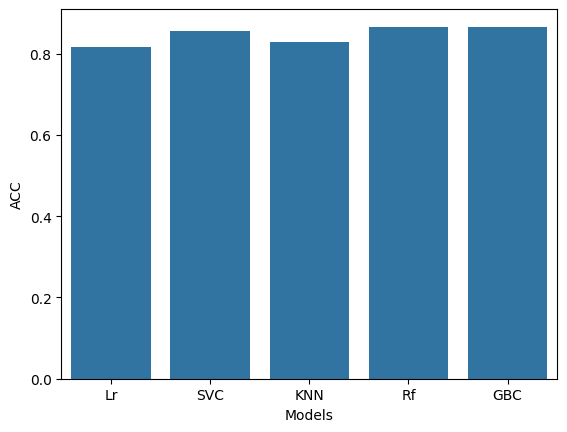

In [151]:
sns.barplot(x=final_data['Models'], y='ACC', data=final_data)